<a href="https://colab.research.google.com/github/popthart/Machine-learning/blob/cs-homework/CSHW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt

In [3]:
def load_mnist_data():
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32')/255
  test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32')/255

  return (train_images, train_labels), (test_images, test_labels)

In [5]:
def load_fashion_mnist_data():
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32')/255
  test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32')/255

  return (train_images, train_labels), (test_images, test_labels)

In [6]:
def build_model():
  model=models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [7]:
def train_model(model, train_images, train_labels, test_images, test_labels):
  model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(train_images, train_labels, epochs=5, batch_size = 64, validation_data=(test_images, test_labels))
  return history

In [9]:
def plot_history(history, title):
  plt.plot(history.history['accuracy'], label= 'accuracy')
  plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.5, 1])
  plt.legend(loc='lower right')
  plt.show()


In [12]:
def compare_datasets():
  (mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = load_mnist_data()
  (fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = load_fashion_mnist_data()

  print('MNIST data training')
  mnist_model = build_model()
  mnist_history = train_model(mnist_model, mnist_train_images, mnist_train_labels, mnist_test_images, mnist_test_labels)
  plot_history(mnist_history, "MNIST Accuracy")

  print('\nFashion-MNIST data training')
  fashion_model = build_model()
  fashion_history = train_model(fashion_model, fashion_train_images, fashion_train_labels, fashion_test_images, fashion_test_labels)
  plot_history (fashion_history, "Fashion-MNIST Accuracy")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST data training


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.8577 - loss: 0.4386 - val_accuracy: 0.9818 - val_loss: 0.0565
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9830 - loss: 0.0539 - val_accuracy: 0.9879 - val_loss: 0.0390
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9882 - loss: 0.0358 - val_accuracy: 0.9880 - val_loss: 0.0374
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9901 - loss: 0.0296 - val_accuracy: 0.9891 - val_loss: 0.0336
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 62ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9898 - val_loss: 0.0328


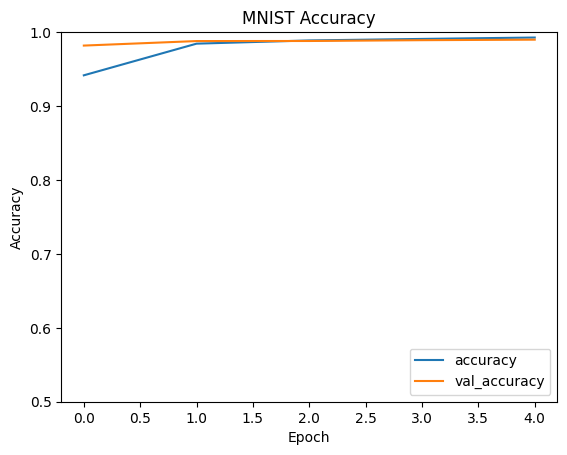


Fashion-MNIST data training
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.7149 - loss: 0.7962 - val_accuracy: 0.8593 - val_loss: 0.3841
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.8721 - loss: 0.3528 - val_accuracy: 0.8777 - val_loss: 0.3360
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.8915 - loss: 0.2946 - val_accuracy: 0.8916 - val_loss: 0.2957
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9039 - loss: 0.2630 - val_accuracy: 0.9019 - val_loss: 0.2767
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9130 - loss: 0.2355 - val_accuracy: 0.8944 - val_loss: 0.2933


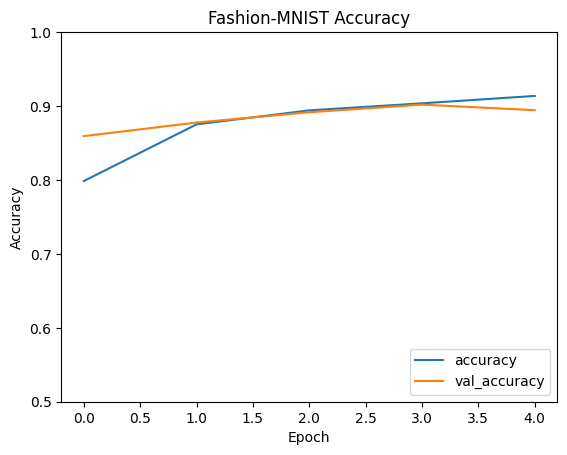

In [13]:
compare_datasets()



# The MNIST datasets has simple digits images, which makes it easy to classify, so the model trained using MNIST had higher accuracy from 98%-99%.

# Using fashion-MNIST is more complex, so the model had lower accuracy, with a range of 87%-91%.

# `As for the trianing times, they are very similar considering the sizes of each dataset, but because of the complexity of the Fahsion-MNIST images, the fashion-MNIST training times are slightly longer. The difference, though, is barely necessary to metnion, as it is an insignificant amount.`



In [14]:
def build_new_model():
  model=models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [15]:
def train_new_model(model, train_images, train_labels, test_images, test_labels):
  model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  new_history = model.fit(train_images, train_labels, epochs=5, batch_size = 64, validation_data=(test_images, test_labels))
  return new_history

In [21]:
import time
def compare_models():
  (mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = load_mnist_data()

  print("\nOriginal Model Training")
  original_model = build_model()
  start_time = time.time()
  original_history = train_model(original_model, mnist_train_images, mnist_train_labels, mnist_test_images, mnist_test_labels)
  end_time = time.time()
  original_training_time = end_time - start_time

  plot_history(original_history, "Original Model Accuracy")
  print(f'Original training time: {original_training_time:.2f} seconds')

  print("\nNew Model Training")
  new_model = build_new_model()
  start_time = time.time()
  new_history = train_new_model(new_model, mnist_train_images, mnist_train_labels, mnist_test_images, mnist_test_labels)
  end_time = time.time()
  new_training_time = end_time - start_time

  plot_history(new_history, "New Model Accuracy")
  print(f'New training time: {new_training_time:.2f} seconds')


Original Model Training


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.8684 - loss: 0.4365 - val_accuracy: 0.9817 - val_loss: 0.0544
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9843 - loss: 0.0533 - val_accuracy: 0.9897 - val_loss: 0.0358
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9894 - loss: 0.0336 - val_accuracy: 0.9906 - val_loss: 0.0284
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9914 - loss: 0.0251 - val_accuracy: 0.9906 - val_loss: 0.0281
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9897 - val_loss: 0.0330


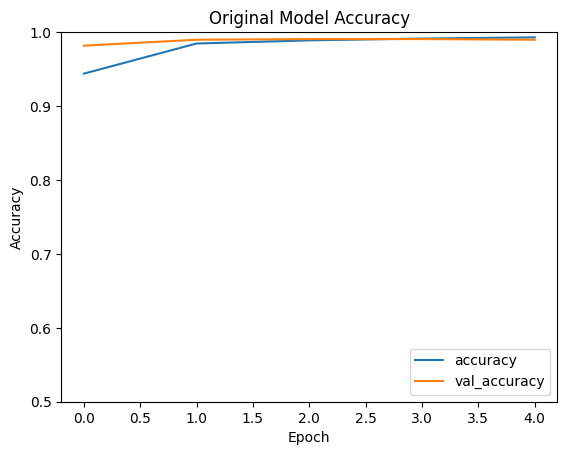

Original training time: 383.72 seconds

New Model Training
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 112s 117ms/step - accuracy: 0.9032 - loss: 0.3136 - val_accuracy: 0.9849 - val_loss: 0.0469
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 115ms/step - accuracy: 0.9861 - loss: 0.0461 - val_accuracy: 0.9880 - val_loss: 0.0385
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 117ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9865 - val_loss: 0.0486
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 113ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9901 - val_loss: 0.0332
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9940 - val_loss: 0.0239


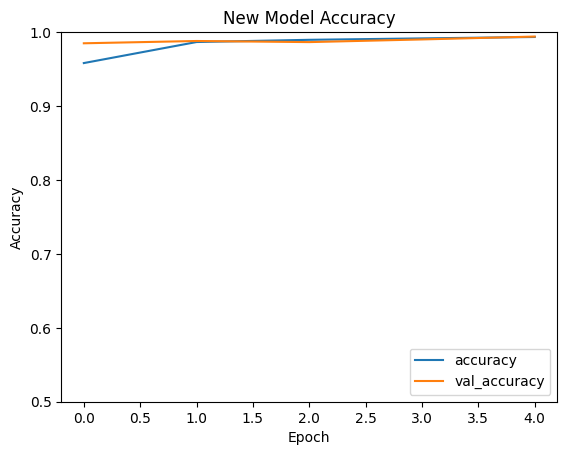

New training time: 711.85 seconds


In [22]:
compare_models()

# `As we can see, the original model took 383 seconds total, while the model with the additional layers took over 700 seconds! The accuracy, however, is still quite identical.`
